# Working with Output Data Example

In [2]:
import json
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from nccut.project_file_printer import project_file_printer

In [3]:
# Load and print project file
f = open("project_example.json")
p_dat = json.load(f)
project_file_printer(p_dat, 0)

Vorticity:
    Marker 1:
        Average: [5.638186187983198e-06, -4.549319009396761e-06, ...]
        Cut 1:
            x: [1227.0, 1228.0, ...]
            y: [947.0398906795897, 946.3851846636708, ...]
            Cut: [3.064511662147072e-05, -2.108520411035399e-05, ...]
        Cut 2:
            x: [1205.0, 1206.0, ...]
            y: [924.9126362658944, 923.9739110532771, ...]
            Cut: [-6.496774869836616e-06, -4.211406507406543e-05, ...]
        Cut 3:
            x: [1206.9596891937672, 1206.309226148353, ...]
            y: [859.0, 860.0, ...]
            Cut: [4.851223168612789e-05, 6.568156222022859e-06, ...]
        Cut 4:
            x: [1142.0, 1143.0, ...]
            y: [873.4677072758241, 872.5328893481708, ...]
            Cut: [1.0624932719534422e-05, -1.7340713871231476e-05, ...]
        Cut 5:
            x: [1130.0, 1131.0, ...]
            y: [816.928193439454, 816.9477873243474, ...]
            Cut: [1.824658592777327e-06, -4.074183799720612e-06, ...]


Text(0, 0.5, 'Vorticity')

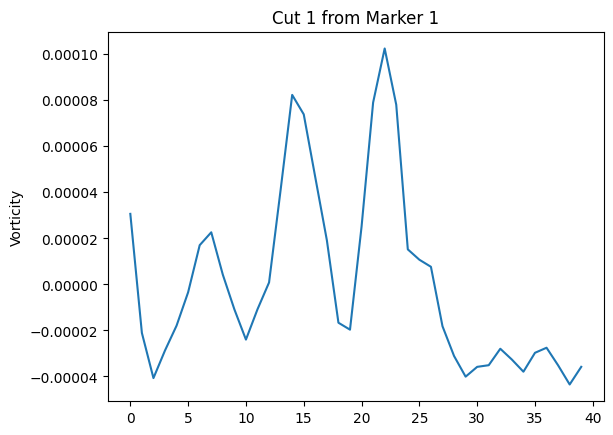

In [4]:
# Plot a Single Cut
plt.plot(p_dat["Vorticity"]["Marker 1"]["Cut 1"]["Cut"])
plt.title("Cut 1 from Marker 1")
plt.ylabel("Vorticity")

In [5]:
# Load the NetCDF file 
nc_dat = xr.open_dataset("example_4v.nc")
print(nc_dat)

<xarray.Dataset> Size: 54MB
Dimensions:       (y: 1499, x: 1499)
Coordinates:
    lon           (y, x) float32 9MB ...
    lat           (y, x) float32 9MB ...
    time          int64 8B ...
    k             int64 8B ...
    face          int64 8B ...
Dimensions without coordinates: y, x
Data variables:
    Divergence    (y, x) float32 9MB ...
    Vorticity     (y, x) float32 9MB ...
    Shear         (y, x) float32 9MB ...
    Rosby Number  (y, x) float32 9MB ...


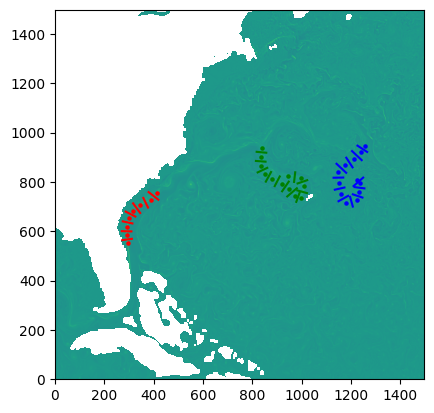

In [6]:
# Plot the Markers over the NetCDF File

plt.imshow(nc_dat["Vorticity"])

colors = ["b", "g", "r"]

for ind, marker in enumerate(list(p_dat["Vorticity"].keys())):
    # Plot the click points
    plt.scatter(p_dat["Vorticity"][marker]["Click x"], p_dat["Vorticity"][marker]["Click y"], s=5, color=colors[ind])

    # Plot each Transect
    for cut in list(p_dat["Vorticity"][marker].keys())[1:-3]:
        plt.plot(p_dat["Vorticity"][marker][cut]["x"], p_dat["Vorticity"][marker][cut]["y"], color=colors[ind])

# Flip Y-Axis to match Cartesian Coordinates
plt.gca().invert_yaxis()